In [3]:
import requests
import pandas as pd
import io

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
from IPython.display import HTML

import geopandas as gpd
import contextily as ctx

import urllib

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import plotly.graph_objects as go
from plotly.subplots import make_subplots


import warnings
warnings.filterwarnings("ignore")


In [5]:
df = pd.read_csv(filepath_or_buffer = "C:/Users/Benjamin/Desktop/IWEPS/Data/Data_intermediaire/Gini_carte.csv")
df

,Pays,Gini
0,AT,0.727843
1,BE,0.615315
2,CY,0.686821
3,DE,0.657331
4,E1,NaN
5,EE,0.623158
6,ES,0.704491
7,FI,0.622434
8,FR,0.679126
9,GR,0.658845


In [38]:
map_path = "C:/Users/Benjamin/Desktop/IWEPS/Data/Data_intermediaire/" + "europeHigh.json"
sf = gpd.read_file(map_path)
sf.head(3)

,name,id,Continent,geometry
0,Russia,RU,Europe,"MULTIPOLYGON (((22.76630 54.35680, 22.16820 54..."
1,Gibraltar,GI,Europe,"POLYGON ((-5.33450 36.16240, -5.33830 36.11230..."
2,Netherlands,NL,Europe,"MULTIPOLYGON (((4.22620 51.38650, 4.17260 51.3..."


In [39]:
type(sf["id"][0])
type(df["Pays"][0])

str

Tout d'abord l'Europe et ses pays !' :


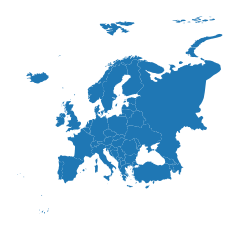

In [40]:
ax = sf.plot()
ax.set_axis_off()
print("Tout d'abord l'Europe et ses pays !' :")

In [44]:
df_pays = sf.merge(df, how = "left", left_on = "id", right_on = "Pays")



In [47]:
# df_pays

<AxesSubplot:>

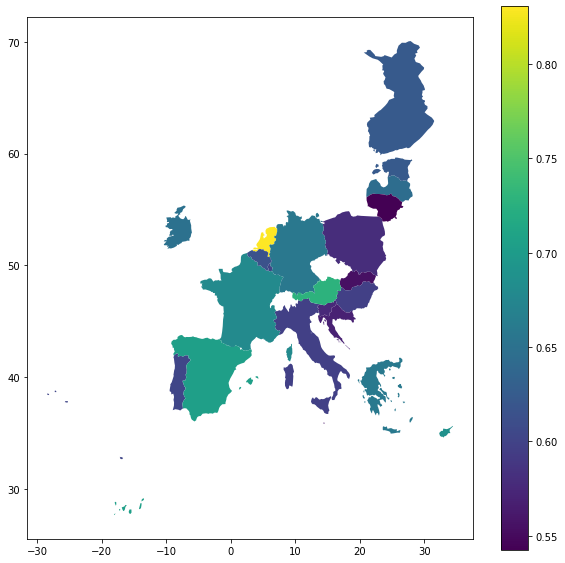

In [48]:
df_pays["centre_pays"] = df_pays.centroid


fig,ax = plt.subplots(figsize=(10, 10))
df_pays.plot(ax = ax, column = "Gini", legend=True)


In [ ]:
fig = px.scatter(df_region,
                 x="Taux de pauvreté-Ensemble (%)",
                 y='Ensemble des médecins',
                 color='nom',
                 size='pop_region_2020',
                 size_max=45)

fig.update_layout(showlegend=True, 
                  legend_title ='Région', 
                  title_text="\n Nombre de médecins par région en fonction du taux de pauvreté moyen\n", 
                  height=600,
                  autosize=True)

fig.show()